In [2]:
import json
import numpy as np
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def l2_distance(a, b, show_output=False):
    a, b = np.array(a), np.array(b)
    distance = np.linalg.norm(a - b)
    
    if show_output:
        print('L2 Distance: ', distance)
    return distance

In [4]:
data_loc = 'data/log_original_300epochs/blank_data.json'

data_loc_edited = 'data/log_222_300epochs/blank_data.json'

In [5]:

with open(data_loc, "r+") as fhandle:
    data = json.load(fhandle)
with open(data_loc_edited, "r+") as fhandle:
    data_edited = json.load(fhandle)
    
arr = np.array(data[1])
arr_edited = np.array(data_edited[1])

arr = arr.reshape((-1, 28))
arr_edited = arr_edited.reshape((-1, 28))


l2_data = []
for frame_id in range(arr.shape[0] - 1):
    pose1 = arr[frame_id]
    pose2 = arr[frame_id + 1]
    dist = l2_distance(pose1, pose2, show_output=False)
    l2_data.append((frame_id, dist))
    
l2s = np.array(l2_data)
l2s.shape

l2_data_edited = []
for frame_id in range(arr_edited.shape[0] - 1):
    pose1 = arr_edited[frame_id]
    pose2 = arr_edited[frame_id + 1]
    dist = l2_distance(pose1, pose2, show_output=False)
    l2_data_edited.append((frame_id, dist))
    
l2s_edited = np.array(l2_data_edited)
l2s_edited.shape


(1444, 2)

(28, 1447)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

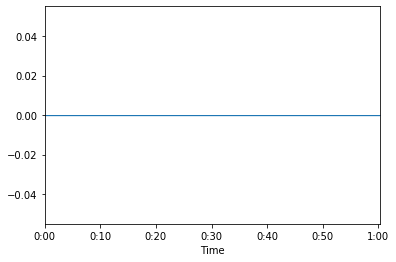

In [6]:
audio_file_path = 'data/audio/blank.wav'

x, fs = librosa.load(audio_file_path)
librosa.display.waveplot(x, sr=fs)

mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=28, n_fft=1000, hop_length=918)
print(mfccs.shape)

x



In [7]:
audio_feats = []

In [8]:
for i in range(1444):
    audio_feats.append(np.median(x[i * 918 : (i+1) * 918]) * 300)
    #print(i * 918, (i+1) * 918)
    
audio_feats = np.array(audio_feats)

#audio_feats[np.where(audio_feats < 0)] = 0

audio_feats.shape

(1444,)

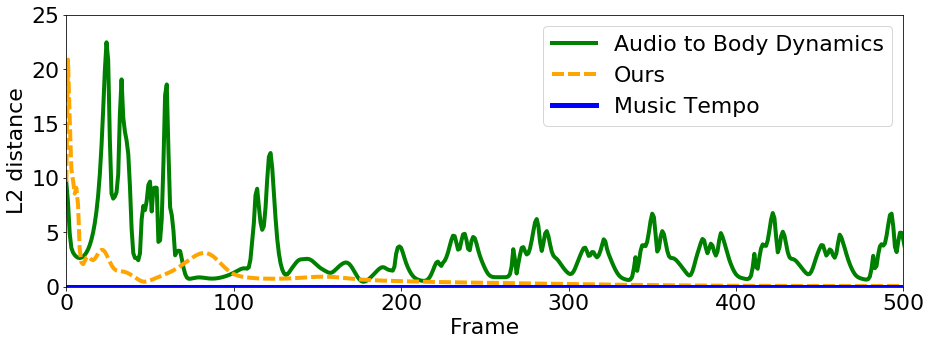

In [9]:
font = {'size'   : 22}	
plt.rc('font', **font)

plt.figure(figsize=(15,5))
plt.plot(l2s[:, 0], l2s[:, 1], color='g', label='Audio to Body Dynamics', linewidth=4)

dashes = [3,1,3,1] # 5 points on, 2 off, 3 on, 1 off

l, = plt.plot(l2s_edited[:, 0], l2s_edited[:, 1], color='orange', label='Ours', linewidth=4)

l.set_dashes(dashes)

plt.plot(l2s_edited[:, 0], audio_feats, color='b', label="Music Tempo", linewidth=5)
plt.axis([0, 500, 0, 25])
plt.legend()
plt.ylabel('L2 distance')
plt.xlabel('Frame')
plt.plot()
plt.show()

In [135]:
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=28, n_fft=1000, hop_length=918)
print(mfccs.shape)

(28, 3707)


In [42]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [137]:
mfcc_t = np.transpose(mfccs)

In [138]:
mfcc_t.shape

(3707, 28)

In [139]:
mfcc_t[5]

array([-1.1425372e+02,  9.5563080e+01, -1.3547152e+01,  1.3412008e+01,
       -1.8056889e+01,  1.1884447e+01,  1.0212743e+01, -8.1006050e+00,
       -1.4452895e+01,  5.0067835e+00, -1.0163727e+01, -5.8542967e+00,
       -6.7382188e+00, -7.9068267e-01, -1.3548516e+01,  4.9434811e-02,
       -3.3741584e+00, -4.2700138e+00, -2.1211847e+01, -4.0308738e+00,
       -2.8568268e+00,  1.6975899e+00, -5.9051719e+00,  5.8526030e+00,
       -8.4925480e+00, -1.0655520e+00, -3.5495722e+00,  5.0589385e+00],
      dtype=float32)

In [140]:
mfccs[0]

array([-530.1182, -530.1182, -530.1182, ..., -530.1182, -530.1182,
       -530.1182], dtype=float32)

In [22]:
x.shape

(3894160,)

In [13]:
fs

22050

In [23]:
3290112 / 3582

906.6728754365541

In [15]:
3582 * 918

3288276

(3704,)